# 手写数字识别-获取mnist数据集

In [1]:
import os
import struct
import numpy as np
import matplotlib.pyplot as plt
pah = os.path.join(os.environ['HOME'],'Downloads/demodata')

def load_mnist(path,kind='train'):
    """Load MNIST data from path"""
    labels_path = os.path.join(path,'%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path,'%s-images-idx3-ubyte' % kind)
    with open(labels_path,'rb') as lbpath:
        magic, n = struct.unpack('>II',lbpath.read(8))
        labels = np.fromfile(lbpath,dtype=np.uint8)
    with open(images_path,'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII',imgpath.read(16))
        images = np.fromfile(imgpath,dtype=np.uint8).reshape(len(labels),784)
    return images,labels

X_train,y_train = load_mnist(pah,kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0],X_train.shape[1]))

Rows: 60000, columns: 784


In [2]:
X_test,y_test = load_mnist(pah,kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0],X_test.shape[1]))

Rows: 10000, columns: 784


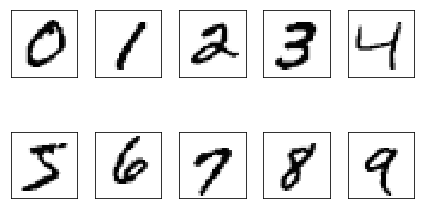

In [3]:
fig, ax = plt.subplots(nrows=2,ncols=5,sharex=True,sharey=True)
ax= ax.flatten()
for i in range(10):
    img= X_train[y_train == i][0].reshape(28,28)
    ax[i].imshow(img,cmap='Greys',interpolation='nearest')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

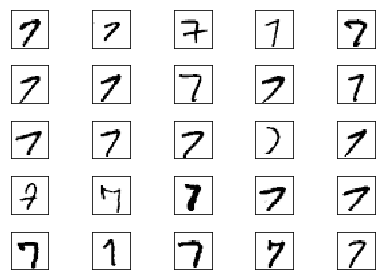

In [4]:
fig,ax = plt.subplots(nrows=5,ncols=5,sharex=True,sharey=True)
ax=ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28,28)
    ax[i].imshow(img,cmap='Greys',interpolation='nearest')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

将数据存储到文件
np.savetxt(pah+'/train_img.csv',X_train,fmt='%i', delimiter=',')
np.savetxt(pah+'/train_labels.csv',y_train,fmt='%i', delimiter=',')
np.savetxt(pah+'/test_img.csv',X_test,fmt='%i', delimiter=',')
np.savetxt(pah+'/test_labels.csv',y_test,fmt='%i', delimiter=',')

从文件加载数据
X_train = np.genfromtxt(pah+'/train_img.csv',dtype=int,delimiter=',')
y_train = np.genfromtxt(pah+'/train_img.csv',dtype=int,delimiter=',')
X_test = np.genfromtxt(pah+'/train_img.csv',dtype=int,delimiter=',')
y_test = np.genfromtxt(pah+'/train_img.csv',dtype=int,delimiter=',')

# 实现一个多层感知器

In [5]:
from neuralnet import NeuralNetMLP
nn = NeuralNetMLP(n_output=10,
                 n_features=X_train.shape[1],
                 n_hidden=50,
                 l2=0.1,
                 l1=0.0,
                 epochs=1000,
                 eta=0.001,
                 alpha=0.001,
                 decrease_const=0.00001,
                 shuffle=True,
                 minibatches=50,
                 random_state=1)
nn.fit(X_train,y_train,print_progress=True)

Epoch: 1000/1000

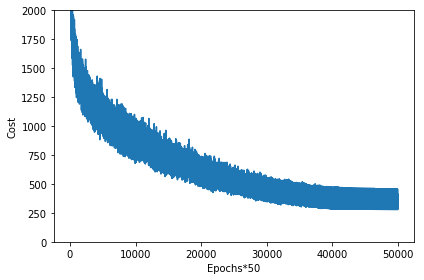

In [6]:
plt.plot(range(len(nn.cost_)),nn.cost_)
plt.ylim([0,2000])
plt.ylabel('Cost')
plt.xlabel('Epochs*50')
plt.tight_layout()
plt.show()

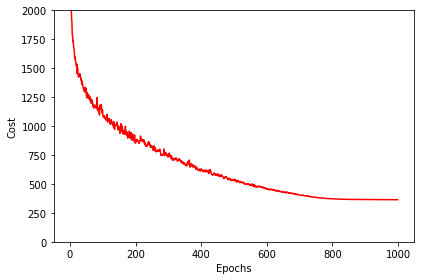

In [7]:
batches = np.array_split(range(len(nn.cost_)),1000)
cost_ary = np.array(nn.cost_)
cost_avgs = [np.mean(cost_ary[i]) for i in batches]
plt.plot(range(len(cost_avgs)),
        cost_avgs,
        color='red')
plt.ylim([0,2000])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

In [8]:
y_train_pred =nn.predict(X_train)
acc = np.sum(y_train == y_train_pred,axis=0)/X_train.shape[0]
print('Training accuaracy: %.2f%%' % (acc*100))
y_test_pred =nn.predict(X_test)
acc =np.sum(y_test == y_test_pred,axis=0)/X_test.shape[0]
print('Training accuaracy: %.2f%%' % (acc*100))

Training accuaracy: 97.53%
Training accuaracy: 95.69%


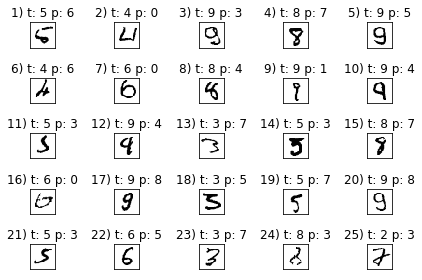

In [9]:
miscl_img =X_test[y_test !=y_test_pred][:25]
correct_lab =y_test[y_test !=y_test_pred][:25]
miscl_lab = y_test_pred[y_test !=y_test_pred][:25]

fig,ax =plt.subplots(nrows=5,
                    ncols=5,
                    sharex=True,
                    sharey=True)
ax=ax.flatten()
for i in range(25):
    img=miscl_img[i].reshape(28,28)
    ax[i].imshow(img,cmap='Greys',interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1,correct_lab[i],miscl_lab[i]))
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()